In [1]:
from psycopg2 import connect
from modules.Cobertura import Cobertura
from modules.conector_postgree import Interface_db_postgree
from modules.conector_cassandra import Interface_db_cassandra
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import psycopg2
from psycopg2.extras import execute_values
from cassandra.query import BatchStatement
from cassandra.cluster import Cluster, ProfileManager
import matplotlib.pyplot as plt

In [4]:
def chunk(dataframe, size):
    
    for i in range(0, len(dataframe), size): 
        yield dataframe[i:i + size]

In [7]:
lendo = Cobertura(r"C:\Users\isa66\Desktop\Visualcode\.vscode\Telecomunicações\arquivos\Municipios_acesso_cobertura\Meu_Municipio_Cobertura.csv")
lendo.tratamento_geral()
df_municipio_cobertura = lendo.get_resultado()
print('tratado')

tratado


In [8]:
chunked_municipio_cobertura = chunk(df_municipio_cobertura, 50000)

In [9]:
con = psycopg2.connect(user='postgres', password='Eugostode@55', host='localhost', database='telecomunicacao')
cursor = con.cursor()
print('conexao')

conexao


In [10]:
for df in chunked_municipio_cobertura:
    try:
        data = np.array(df)
        list_postgre = []
        for item in data:
            value = tuple(item)
            list_postgre.append(value)  
        # list_postgre = str(list_postgre)[1:-1]
        sql = f"INSERT INTO municipio_cobertura (operadora , tecnologia_cobertura , Moradores_cobertos , Domicilios_cobertos , Area_coberta , Moradores_municipio , domicilios_Municipio , Area_municipio , Ano , codigo_ibge , municipio , uf , nome_uf , regiao , codigo_nacional) values   %s;"
        execute_values(cursor, sql, list_postgre)
        con.commit()
        print('inerindo')
    except Exception as e:
        print("Erro ao inserir dados ", str(e))

inerindo
inerindo
inerindo
inerindo
inerindo
inerindo


In [11]:
conect_post = Interface_db_postgree('postgres','Eugostode@55', 'localhost', 'telecomunicacao')

In [26]:
dados_municipio_cobertura = conect_post.select(query=" select t1.*,  t2.Moradores_cobertos, t2.Domicilios_cobertos, t2.Area_coberta,  t3.Moradores_municipio, t3.domicilios_Municipio, t3.Area_municipio, t4.codigo_ibge, t4.municipio, t4.uf, t4.nome_uf, t4.regiao, t4.codigo_nacional  from Operadoras t1 inner join AreaCobertura t2  on t2.id_cobertura = t1.id_cobertura  inner join AreaMunipios t3 on t3.id_cobertura = t2.id_cobertura inner join LocaisCobertura t4 on t4.id_cobertura = t3.id_cobertura order by t1.id_cobertura;") 
df_municipio_cobertura = pd.DataFrame(dados_municipio_cobertura)
a = df_municipio_cobertura
print(a)

            0       1       2      3               4               5   \
0            1  2021.0   LIGUE     2G               0               0   
1            2  2021.0     TIM  3G+4G               0               0   
2            3  2021.0   LIGUE     3G               0               0   
3            4  2021.0    VIVO     4G               0               0   
4            5  2021.0   CLARO     2G  439,7331951305  132,9313969959   
...        ...     ...     ...    ...             ...             ...   
258790  258791     NaN  NEXTEL  Todas               0               0   
258791  258792     NaN      OI     3G               0               0   
258792  258793     NaN     TIM  3G+4G               0               0   
258793  258794     NaN  NEXTEL  3G+4G               0               0   
258794  258795     NaN   CLARO  3G+4G               0               0   

                     6       7       8                9        10  \
0                     0  6885.0  2174.0  369,861546188

In [28]:
query = """
    INSERT INTO municipio_cobertura (
            id_cobertura,
            Ano,
            operadora,
            tecnologia_cobertura,
            Moradores_cobertos,
            Domicilios_cobertos,
            Area_coberta,
            Moradores_municipio,
            domicilios_Municipio,
            Area_municipio,
            codigo_ibge,
            municipio,
            uf,
            nome_uf,
            regiao,
            codigo_nacional
    ) values (
        ?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
    )
"""

In [29]:
conect_cassa = Interface_db_cassandra('telecomunicacoes') 

In [30]:
insert = conect_cassa.connector().prepare(query)
chunked_df = chunk(df_municipio_cobertura, 100)
for df in chunked_df:
    batch = BatchStatement()
    for _, row in df.iterrows():
        batch.add(insert, tuple(row))
    print(">> executando batch")
    conect_cassa.inserir(batch)
print(">> dados inseridos")
    
print("inseriu tudo")

>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch


In [2]:
conect_cassa = Cluster()
session = conect_cassa.connect("telecomunicacoes")

In [3]:
query = "SELECT * FROM municipio_cobertura;"
a = session.execute(query) 

In [4]:
lista = []
for i in a:
    lista.append(i)
b = pd.DataFrame(lista)
print(b)

        id_cobertura     ano     area_coberta   area_municipio codigo_ibge  \
0               4317  2021.0   69,73890277575  799,12408551743     5221452   
1              62693  2021.0                0  63,610377394616     2509156   
2             121478  2021.0                0  572,51843623917     2107209   
3             113295  2021.0                0  60,688100939982     4323804   
4             176996  2021.0  254,78349578062  762,34320480837     2602605   
...              ...     ...              ...              ...         ...   
258790         28249  2021.0  240,90544302484  1568,2230956416     2921203   
258791        246224  2021.0  6,8286802191965  295,83700486377     3103751   
258792         56818  2021.0                0  1264,2454948424     3111408   
258793        194721  2021.0  17,502204691266  626,71905647459     5221809   
258794        104823  2021.0  775,84320510443  3735,1640315279     4303004   

       codigo_nacional domicilios_cobertos domicilios_municipio

In [8]:
centro_oeste = b.loc[b["regiao"] == 'Centro-oeste']
nordeste = b.loc[b["regiao"] == 'Nordeste']
norte = b.loc[b["regiao"] == 'Norte']
sudeste = b.loc[b["regiao"] == 'Sudeste'] 
sul = b.loc[b["regiao"]== 'Sul']


print(b.info())

dataframe_centro_oeste = centro_oeste.groupby("operadora").sum()
dataframe_centro_oeste.reset_index(inplace = True)
dataframe_nordeste = nordeste.groupby("operadora").sum()
dataframe_nordeste.reset_index(inplace = True)
dataframe_norte = norte.groupby("operadora").sum()
dataframe_norte.reset_index(inplace = True)
dataframe_sudeste = sudeste.groupby("operadora").sum()
dataframe_sudeste.reset_index(inplace = True)
dataframe_sul = sul.groupby("operadora").sum()
dataframe_sul.reset_index(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258795 entries, 51804 to 72867
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_cobertura          258795 non-null  int64  
 1   ano                   258795 non-null  object 
 2   area_coberta          258795 non-null  float64
 3   area_municipio        258795 non-null  object 
 4   codigo_ibge           258795 non-null  object 
 5   codigo_nacional       258795 non-null  object 
 6   domicilios_cobertos   258795 non-null  object 
 7   domicilios_municipio  258795 non-null  object 
 8   moradores_cobertos    258795 non-null  object 
 9   moradores_municipio   258795 non-null  object 
 10  municipio             258795 non-null  object 
 11  nome_uf               258795 non-null  object 
 12  operadora             258795 non-null  object 
 13  regiao                258795 non-null  object 
 14  tecnologia_cobertura  258795 non-null  object 
 1

In [5]:
b.sort_values(by=['id_cobertura'], ascending=False, inplace=True)
b['area_coberta'] = b['area_coberta'].str.replace(",", ".")
b['area_coberta'] = b['area_coberta'].astype(float, errors = 'raise')
claro = b.loc[b["operadora"] == 'CLARO'] 
oi = b.loc[b["operadora"] == 'OI']
tim = b.loc[b["operadora"] == 'TIM']
vivo = b.loc[b["operadora"] == 'VIVO']


print(b.info())

dataframe_claro = claro.groupby("regiao").sum()
dataframe_claro.reset_index(inplace = True)
dataframe_oi = oi.groupby("regiao").sum()
dataframe_oi.reset_index(inplace = True)
dataframe_tim = tim.groupby("regiao").sum()
dataframe_tim.reset_index(inplace = True)
dataframe_vivo = vivo.groupby("regiao").sum()
dataframe_vivo.reset_index(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258795 entries, 51804 to 72867
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_cobertura          258795 non-null  int64  
 1   ano                   258795 non-null  object 
 2   area_coberta          258795 non-null  float64
 3   area_municipio        258795 non-null  object 
 4   codigo_ibge           258795 non-null  object 
 5   codigo_nacional       258795 non-null  object 
 6   domicilios_cobertos   258795 non-null  object 
 7   domicilios_municipio  258795 non-null  object 
 8   moradores_cobertos    258795 non-null  object 
 9   moradores_municipio   258795 non-null  object 
 10  municipio             258795 non-null  object 
 11  nome_uf               258795 non-null  object 
 12  operadora             258795 non-null  object 
 13  regiao                258795 non-null  object 
 14  tecnologia_cobertura  258795 non-null  object 
 1

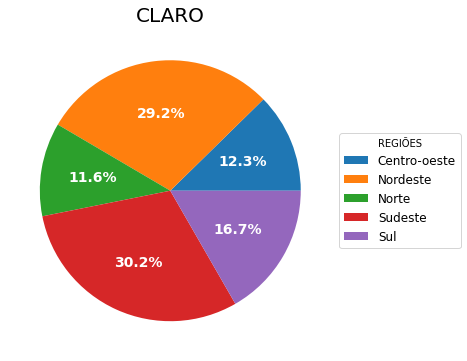

In [6]:
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_claro["regiao"]
data = dataframe_claro["area_coberta"]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"))
ax.legend(wedges, recipe,title="REGIÕES", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
ax.set_title("CLARO", size= 20)

plt.show()

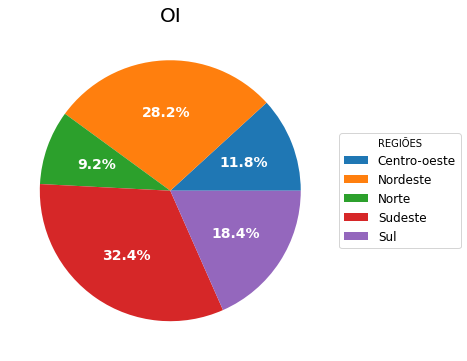

In [7]:
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_oi["regiao"]
data = dataframe_oi["area_coberta"]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"))
ax.legend(wedges, recipe,title="REGIÕES", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
ax.set_title("OI", size= 20)

plt.show()

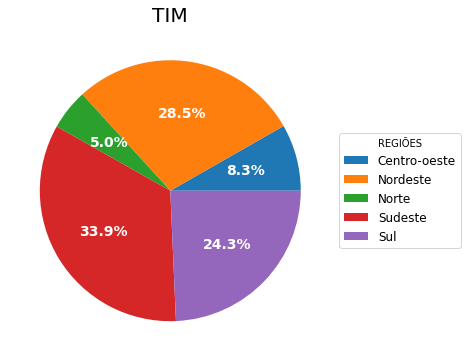

In [8]:
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_tim["regiao"]
data = dataframe_tim["area_coberta"]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"))
ax.legend(wedges, recipe,title="REGIÕES", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
ax.set_title("TIM", size= 20)

plt.show()

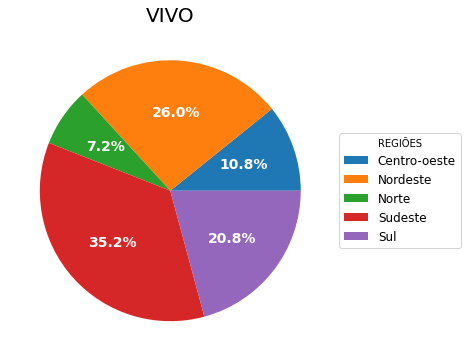

In [9]:
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect="equal"))
recipe = dataframe_vivo["regiao"]
data = dataframe_vivo["area_coberta"]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%' .format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color = "w"))
ax.legend(wedges, recipe,title="REGIÕES", loc= "center left", bbox_to_anchor=(1,0,0.5,1),fontsize=12)

plt.setp(autotexts, size = 14, weight="bold")
ax.set_title("VIVO", size= 20)

plt.show()

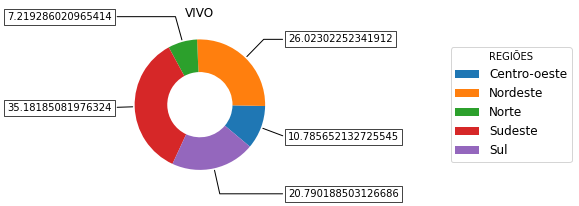

In [31]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
dataframe_vivo['area_coberta %'] = dataframe_vivo['area_coberta']/sum(dataframe_vivo['area_coberta'])*100
recipe = dataframe_vivo['regiao']

data = dataframe_vivo['area_coberta %']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(data[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("VIVO")
ax.legend(wedges, recipe,title="REGIÕES", loc= "center left", bbox_to_anchor=(2,0,0.5,1),fontsize=12)
plt.show()


In [6]:
b['moradores_cobertos'] = b['moradores_cobertos'].str.replace(",", ".")
b['moradores_cobertos'] = b['moradores_cobertos'].astype(float, errors = 'raise')
dois_g = b.loc[b["tecnologia_cobertura"] == '2G']
tres_g = b.loc[b["tecnologia_cobertura"] == '3G']
quatro_g = b.loc[b["tecnologia_cobertura"] == '4G']
# moradores_cobertos
dataframe_dois_g = dois_g.groupby("operadora").sum()
dataframe_dois_g.reset_index(inplace = True) 
dataframe_tres_g = tres_g.groupby("operadora").sum()
dataframe_tres_g.reset_index(inplace = True) 
dataframe_quatro_g = quatro_g.groupby("operadora").sum()
dataframe_quatro_g.reset_index(inplace = True) 
indexNames = dataframe_dois_g[ dataframe_dois_g['operadora'] == 'Todas' ].index
indexNames1 = dataframe_dois_g[ dataframe_dois_g['operadora'] == 'SERCOMTEL' ].index
indexNames2 = dataframe_dois_g[ dataframe_dois_g['operadora'] == 'LIGUE' ].index
dataframe_dois_g.drop(indexNames, inplace=True)
dataframe_tres_g.drop(indexNames, inplace=True)
dataframe_quatro_g.drop(indexNames, inplace=True)
dataframe_dois_g.drop(indexNames1, inplace=True)
dataframe_tres_g.drop(indexNames1, inplace=True)
dataframe_quatro_g.drop(indexNames1, inplace=True)
dataframe_dois_g.drop(indexNames2, inplace=True)
dataframe_tres_g.drop(indexNames2, inplace=True)
dataframe_quatro_g.drop(indexNames2, inplace=True)



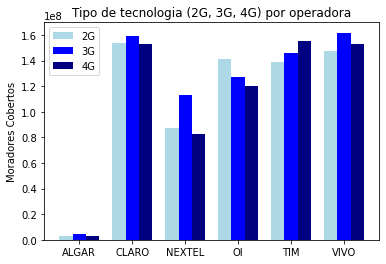

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
valores_produto_A = dataframe_dois_g['moradores_cobertos']

# Quantidade de vendas para o Produto B
valores_produto_B = dataframe_tres_g['moradores_cobertos']

valores_produto_c = dataframe_quatro_g['moradores_cobertos']

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_A))
x2 = [x + 0.25 for x in x1]
x3 = [x1 + 0.25 for x1 in x2]

# Plota as barras
plt.bar(x1, valores_produto_A, width=0.25, label = '2G', color = 'lightblue')
plt.bar(x2, valores_produto_B, width=0.25, label = '3G', color = 'blue')
plt.bar(x3, valores_produto_c, width=0.25, label = '4G', color = 'navy')

# coloca o nome dos meses como label do eixo x
regiao = dataframe_dois_g['operadora']
plt.xticks([x + 0.25 for x in range(len(valores_produto_A))], regiao)

# inseri uma legenda no gráfico
plt.legend()
plt.ylabel("Moradores Cobertos")


plt.title("Tipo de tecnologia (2G, 3G, 4G) por operadora")
plt.show()

In [30]:
dataframe_dois_g['moradores_cobertos %'] = dataframe_dois_g['moradores_cobertos']/sum(dataframe_dois_g['moradores_cobertos'])*100
dataframe_tres_g['moradores_cobertos %'] = dataframe_tres_g['moradores_cobertos']/sum(dataframe_tres_g['moradores_cobertos'])*100
dataframe_quatro_g['moradores_cobertos %'] = dataframe_quatro_g['moradores_cobertos']/sum(dataframe_quatro_g['moradores_cobertos'])*100

In [33]:
dataframe_dois_g.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_dois_g.head(8)

,operadora,id_cobertura,area_coberta,moradores_cobertos,moradores_cobertos %
1,CLARO,744168114,393612.690403,1.539478e+08,22.903499
8,VIVO,744167762,402355.020518,1.476145e+08,21.961252
4,OI,744169807,234892.162998,1.411574e+08,21.000612
6,TIM,744166781,172584.045689,1.391645e+08,20.704115
3,NEXTEL,744168204,58572.708655,8.761295e+07,13.034565
0,ALGAR,744168944,16655.167218,2.661459e+06,0.395957


In [34]:
dataframe_tres_g.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_tres_g.head(8)

,operadora,id_cobertura,area_coberta,moradores_cobertos,moradores_cobertos %
8,VIVO,744169780,654101.239382,1.617158e+08,22.755629
1,CLARO,744166321,536297.880375,1.588531e+08,22.352805
6,TIM,744167123,288363.824031,1.458059e+08,20.516887
4,OI,744167846,163070.550566,1.269172e+08,17.858980
3,NEXTEL,744168814,151620.732721,1.132228e+08,15.931997
0,ALGAR,744169106,22533.527123,4.148157e+06,0.583702


In [35]:
dataframe_quatro_g.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_quatro_g.head(8)

,operadora,id_cobertura,area_coberta,moradores_cobertos,moradores_cobertos %
6,TIM,744167579,424294.769863,1.552409e+08,23.305282
1,CLARO,744168008,513038.515508,1.530852e+08,22.981672
8,VIVO,744168902,504152.351277,1.529372e+08,22.959448
4,OI,744167484,131109.617033,1.199180e+08,18.002490
3,NEXTEL,744168959,69570.679957,8.229858e+07,12.354941
0,ALGAR,744168184,9661.083869,2.638941e+06,0.396167


In [36]:
dataframe_res = b.groupby("operadora").sum()
dataframe_res.reset_index(inplace = True) 

In [37]:
dataframe_res['moradores_cobertos %'] = dataframe_res['moradores_cobertos']/sum(dataframe_res['moradores_cobertos'])*100

In [40]:
dataframe_res.sort_values(by=['moradores_cobertos %'], ascending=False, inplace=True)
dataframe_res.head(8)

,operadora,id_cobertura,area_coberta,moradores_cobertos,moradores_cobertos %
7,Todas,3720839006,4.392205e+06,8.445995e+08,29.177692
1,CLARO,3720838506,1.442949e+06,4.658862e+08,16.094592
8,VIVO,3720844243,1.560609e+06,4.622675e+08,15.969579
6,TIM,3720835749,8.852426e+05,4.402113e+08,15.207622
4,OI,3720839127,5.290723e+05,3.879925e+08,13.403664
3,NEXTEL,3720840372,2.797641e+05,2.831343e+08,9.781212
0,ALGAR,3720841598,4.884978e+04,9.448557e+06,0.326412
5,SERCOMTEL,3720837807,1.497690e+03,1.042577e+06,0.036017
